## Test if mean of random sample is equal to true mean:

As the public concern about bacterial infections increases, a soap manufacture quickly promoted a new product to meet the demand for an antibacterial soap. This new product has a substantially higher price than the “ordinary soaps” on the market. A consumer testing agency notes that ordinary soap also kills bacteria and questions whether the new antibacterial soap is a substantial improvement over ordinary soap.

A procedure for examining the ability of soap to kill bacteria is to place a solution containing the soap onto a petri dish and then add E. coli bacteria. After a 24-hour incubation period, a count of the number of bacteria colonies on the dish is taken. From previous studies using many different brands of ordinary soaps, the mean bacteria count is 33 for ordinary soap products. The consumer group runs the test on the antibacterial soap using 35 petri dishes. The results from the 35 petri dishes is a mean bacterial count of 31.2 with a standard deviation of 8.4. 

**Do the data provide sufficient evidence that the antibacterial soap is more effective than ordinary soap in reducing bacteria counts?** Use a aplha= .05.

In [90]:
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

mean = 33             #population mean becterial count for the antibacterial soap
sample_size = 35
sample_mean = 31.2   #sample mean becterial count for the antibacterial soap
sample_std = 8.4
alpha = 0.05


# Step 1: Defining hypothesis
null_hypothesis = 'mean >= 33'
alternative_hypothesis = 'mean < 33'

# Step 2: Computing test statistic z test
def statistical_test(X,x̄,s,n):
    ztest = (x̄-X)/(s/math.sqrt(n))
    print('ztest',ztest)
    return ztest

# Step 3: Rejection region approach
def rejection_region(α):
    z = statistical_test(mean, sample_mean, sample_std, sample_size)
    zscore_alpha = stats.norm.ppf(α)
    print('zscore of alpha=',zscore_alpha)
    
    if z <= zscore_alpha:
        print('Reject null hypothesis', null_hypothesis)
    else:
        print('\nThe test statistic does not fall in the rejection region, We reserve judgment on accepting H0 until we calculate the chance of a Type II error b for several values of m falling in the alternative hy- pothesis, values of m less than 33. In other words, we conclude that there is insuf- ficient evidence to reject the null hypothesis and hence there is not sufficient evidence that the antibacterial soap is more effective than ordinary soap.')

rejection_region(alpha)


ztest -1.2677313820927751
zscore of alpha= -1.6448536269514729

The test statistic does not fall in the rejection region, We reserve judgment on accepting H0 until we calculate the chance of a Type II error b for several values of m falling in the alternative hy- pothesis, values of m less than 33. In other words, we conclude that there is insuf- ficient evidence to reject the null hypothesis and hence there is not sufficient evidence that the antibacterial soap is more effective than ordinary soap.


Suppose that the consumer testing agency thinks that the manufacturer of the antibacterial soap will take legal action if the antibacterial soap has a population mean bacterial count that is considerably less than 33, say 28. Thus, the consumer group wants to know the probability of a Type II error in its test if the population mean is 28 or smaller—that is, determine B(28) because B(mean) <= B(28) for mean <= 28.


In [91]:
# Computing type error II for B(28)

mean_a= 28

def type_error_II(X,x,s,n,α):
    zscore_Beta= abs(stats.norm.ppf(α))- abs(X-x)/(s/math.sqrt(n))
    print('zscore_Beta=', zscore_Beta)
    B= stats.norm.cdf(zscore_Beta)
    PWR = 1-B
    print('B(28)=', B,'\nPower(28)=',PWR)
    
    if B < 0.05:
        print('\nB: the chance of type error II is relatively small, we accept the null hypothesis and conclude that the antibacterial soap is not more effective than ordinary soap in reducing bacteria counts.')
    else:
        print('we reject null hypothesis')
    
type_error_II(mean, mean_a, sample_std, sample_size,alpha)



zscore_Beta= -1.8766224344173459
B(28)= 0.03028493016982896 
Power(28)= 0.9697150698301711

B: the chance of type error II is relatively small, we accept the null hypothesis and conclude that the antibacterial soap is not more effective than ordinary soap in reducing bacteria counts.


The manufacturer of the antibacterial soap wants to determine the chance that the consumer group may have made an error in reaching its conclusions. The manufacturer wants to compute the probability of a Type II error for a selection of potential values of mean in the alternative hypothesis. This would provide them with an indication of how likely a Type II error may have occurred when in fact the new soap is considerably more effective in reducing bacterial counts in comparison to the mean count for ordinary soap, mean= 33. Repeating the calculations for obtaining B(28).

potential values of mean: 33, 32, 31, 30, 29, 28, 27, 26, 25


type_errors_II= [0.9500000000000001, 0.8265343994076382, 0.5933857805357672, 0.31988084947217743, 0.12053285316495171, 0.03028493016982896, 0.004926904250734863, 0.000509526765436777, 3.310523320030134e-05]

powers= [0.04999999999999993, 0.17346560059236182, 0.4066142194642328, 0.6801191505278226, 0.8794671468350483, 0.9697150698301711, 0.9950730957492652, 0.9994904732345632, 0.9999668947667997]


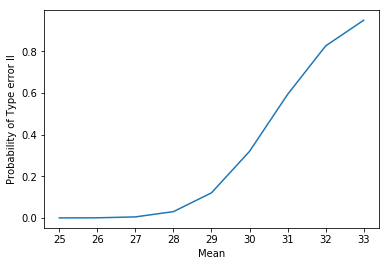

In [92]:
#computing type error II for the means
potential_means = [33, 32, 31, 30, 29, 28, 27, 26, 25]
type_errors_II=[]
powers=[]

def potential_type_error_II(X,x,s,n,α):
    for mean in x:
        zscore_Beta= abs(stats.norm.ppf(α))- abs(X-mean)/(s/math.sqrt(n))
        B= stats.norm.cdf(zscore_Beta)
        type_errors_II.append(B)
        powers.append(1-B)
    
    print('type_errors_II=',type_errors_II)
    print('\npowers=',powers)

potential_type_error_II(mean, potential_means, sample_std, sample_size, aplha)


# plotting means vs probability of Type error II:
plt.plot(potential_means,type_errors_II)
plt.xlabel('Mean')
plt.ylabel('Probability of Type error II')
plt.show()


In [81]:
print ('As the value of mean decreases, the probability of Type II error decreases to 0 and the corresponding power value increases to 1.0. The company could examine this curve to determine whether the chances of Type II error are reasonable for values of mean in alternative hypothesis that are important to the company.\nWe observe that B(28) = 0.0301, a relatively small number. Based on the results, we find that the test statistic does not fall in the rejection region. The manufacturer has decided that if the true population mean bacteria count for its antibacterial soap is 29 or less, it would have a product that would be considered a substantial improvement over ordinary soap. Based on the values of the probability of Type II error displayed, the chance is relatively small that the test run by the consumer agency has resulted in a Type II error for values of the mean bacterial count of 29 or smaller. Thus, the consumer testing agency was relatively certain in reporting that the new antibacterial soap did not decrease the mean bacterial in comparison to ordinary soap.')


As the value of mean decreases, the probability of Type II error decreases to 0 and the corresponding power value increases to 1.0. The company could examine this curve to determine whether the chances of Type II error are reasonable for values of mean in alternative hypothesis that are important to the company.
We observe that B(28) = 0.0301, a relatively small number. Based on the results, we find that the test statistic does not fall in the rejection region. The manufacturer has decided that if the true population mean bacteria count for its antibacterial soap is 29 or less, it would have a product that would be considered a substantial improvement over ordinary soap. Based on the values of the probability of Type II error displayed, the chance is relatively small that the test run by the consumer agency has resulted in a Type II error for values of the mean bacterial count of 29 or smaller. Thus, the consumer testing agency was relatively certain in reporting that the new antibacte

In [93]:
# Step 3: pvalue approach

z = statistical_test(mean, sample_mean, sample_std, sample_size)
pvalue = stats.norm.cdf(z)
print('alpha',alpha)
print('pvalue of z=', pvalue)

if pvalue <= aplha:
    print('Reject null hypothesis', null_hypothesis)
else:
    print('\nThe test statistic does not fall in the rejection region, We reserve judgment on accepting H0 until we calculate the chance of a Type II error b for several values of m falling in the alternative hy- pothesis, values of m less than 33. In other words, we conclude that there is insuf- ficient evidence to reject the null hypothesis and hence there is not sufficient evidence that the antibacterial soap is more effective than ordinary soap.')



ztest -1.2677313820927751
alpha 0.05
pvalue of z= 0.10244694690818923

The test statistic does not fall in the rejection region, We reserve judgment on accepting H0 until we calculate the chance of a Type II error b for several values of m falling in the alternative hy- pothesis, values of m less than 33. In other words, we conclude that there is insuf- ficient evidence to reject the null hypothesis and hence there is not sufficient evidence that the antibacterial soap is more effective than ordinary soap.
